In [87]:
# regression
import pandas as pd

data = pd.read_csv("house_prices.csv", index_col=0)
data = data.rename(columns={"Area_in_Marla": "area"})
data

,property_type,price,location,city,baths,purpose,bedrooms,area
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [88]:
from sklearn.model_selection import train_test_split
# valid data - หน้าตาคล้าย test data บางส่วน ใช้ปรับ model
train_data, test_data = train_test_split(data, test_size=0.3, random_state=0) # 🤔
valid_data, test_data = train_test_split(test_data, test_size=0.5, random_state=0) # 🤔 เอาข้อมูลม่แบ่งครึ่ง
len(train_data), len(valid_data), len(test_data) # 30% , 15% , 15%

(69649, 14925, 14925)

In [89]:
# import numpy as np
# from sklearn.preprocessing import KBinsDiscretizer

# train_data["price"] = np.log10(train_data["price"])

# price_k = KBinsDiscretizer(n_bins=5, encode="ordinal", random_state=0)
# price_k.fit(train_data[["price"]])

# train_data["price"] = price_k.transform(train_data[["price"]])
# train_data["price"]

In [90]:
# test_data["price"] = price_k.transform(test_data[["price"]])
# test_data["price"] = test_data["price"].astype(int)
# test_data["price"]

In [91]:
features = ["property_type", "baths", "bedrooms", "city", "area"] # 🤔
label = "price"

train_data[features]

,property_type,baths,bedrooms,city,area
44749,Flat,2,2,Karachi,3.6
128534,House,5,5,Lahore,10.0
29224,House,3,4,Islamabad,7.0
89063,Lower Portion,2,2,Islamabad,5.0
42944,Flat,2,2,Islamabad,3.6
...,...,...,...,...,...
30618,Flat,2,2,Islamabad,6.2
69578,House,2,2,Lahore,5.0
64395,House,5,5,Lahore,6.0
65830,House,7,5,Lahore,20.0


In [92]:
# regression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

def create_pipeline(): #pipiline รวมขั้นตอน(2) 1.data engineering  2. algorithm ที่ต้องการใช้
    return make_pipeline(

        # 1. data engineering - transfromer
        make_column_transformer( # กำหนดว่าแต่ละ column ทำอะไรบ้าง
            (OneHotEncoder(), ["property_type"]), # 🤔 onehot encoding กับ column "property_type"
            (HashingVectorizer(n_features=5), "city"), # 🤔
            # (StandardScaler(), ["area"]), # 🤔 
            remainder="passthrough"), # 🤔
        

        # 2. algorithm เลือกใช้ตามแผนที่ scikit learn ได้
      
      
      
      
        # LinearRegression() # 🤔
        RandomForestRegressor(n_estimators=10, random_state=0) # 🤔
    )

pipeline = create_pipeline()  # ได้ pipeline ว่าง
pipeline.fit(train_data[features], train_data[label])   # ส่งข้อมูลผ่าน pipeline, fit ให้ model เรียนรู้ object ข้อมูล, มี่ fit ทุกตัวใน scikit learn
pipeline.score(train_data[features], train_data[label])


# ดูประสิทธิภาพสูงสุดของโมเดล -> เอาข้อมูลที่ใช้เทรนโมเดลไปทดสอบ ควรได้คะแนนเต็ม 100% ถ้า feature เหมาะสม 
# เปอร์เซนน้อย ประสิทธิภาพ feature ไม่ดี

0.5694554242366214

In [ ]:
# classification
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import HashingVectorizer
# from sklearn.linear_model import LinearRegression #regression
from sklearn.linear_model import LogisticRegression # classsificaition
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

def create_pipeline(): #pipiline รวมขั้นตอน(2) 1.data engineering  2. algorithm ที่ต้องการใช้
    return make_pipeline(

        # 1. data engineering - transfromer
        make_column_transformer( # กำหนดว่าแต่ละ column ทำอะไรบ้าง
            (OneHotEncoder(), ["property_type"]), # 🤔 onehot encoding กับ column "property_type"
            (HashingVectorizer(n_features=5), "city"), # 🤔
            # (StandardScaler(), ["area"]), # 🤔 
            remainder="passthrough"), # 🤔
        

        # 2. algorithm เลือกใช้ตามแผนที่ scikit learn ได้
      
      
      
      
        # LinearRegression() # 🤔
        RandomForestRegressor(n_estimators=10, random_state=0) # 🤔
    )

pipeline = create_pipeline()  # ได้ pipeline ว่าง
pipeline.fit(train_data[features], train_data[label])   # ส่งข้อมูลผ่าน pipeline, fit ให้ model เรียนรู้ object ข้อมูล, มี่ fit ทุกตัวใน scikit learn
pipeline.score(train_data[features], train_data[label])


# ดูประสิทธิภาพสูงสุดของโมเดล -> เอาข้อมูลที่ใช้เทรนโมเดลไปทดสอบ ควรได้คะแนนเต็ม 100% ถ้า feature เหมาะสม 
# เปอร์เซนน้อย ประสิทธิภาพ feature ไม่ดี

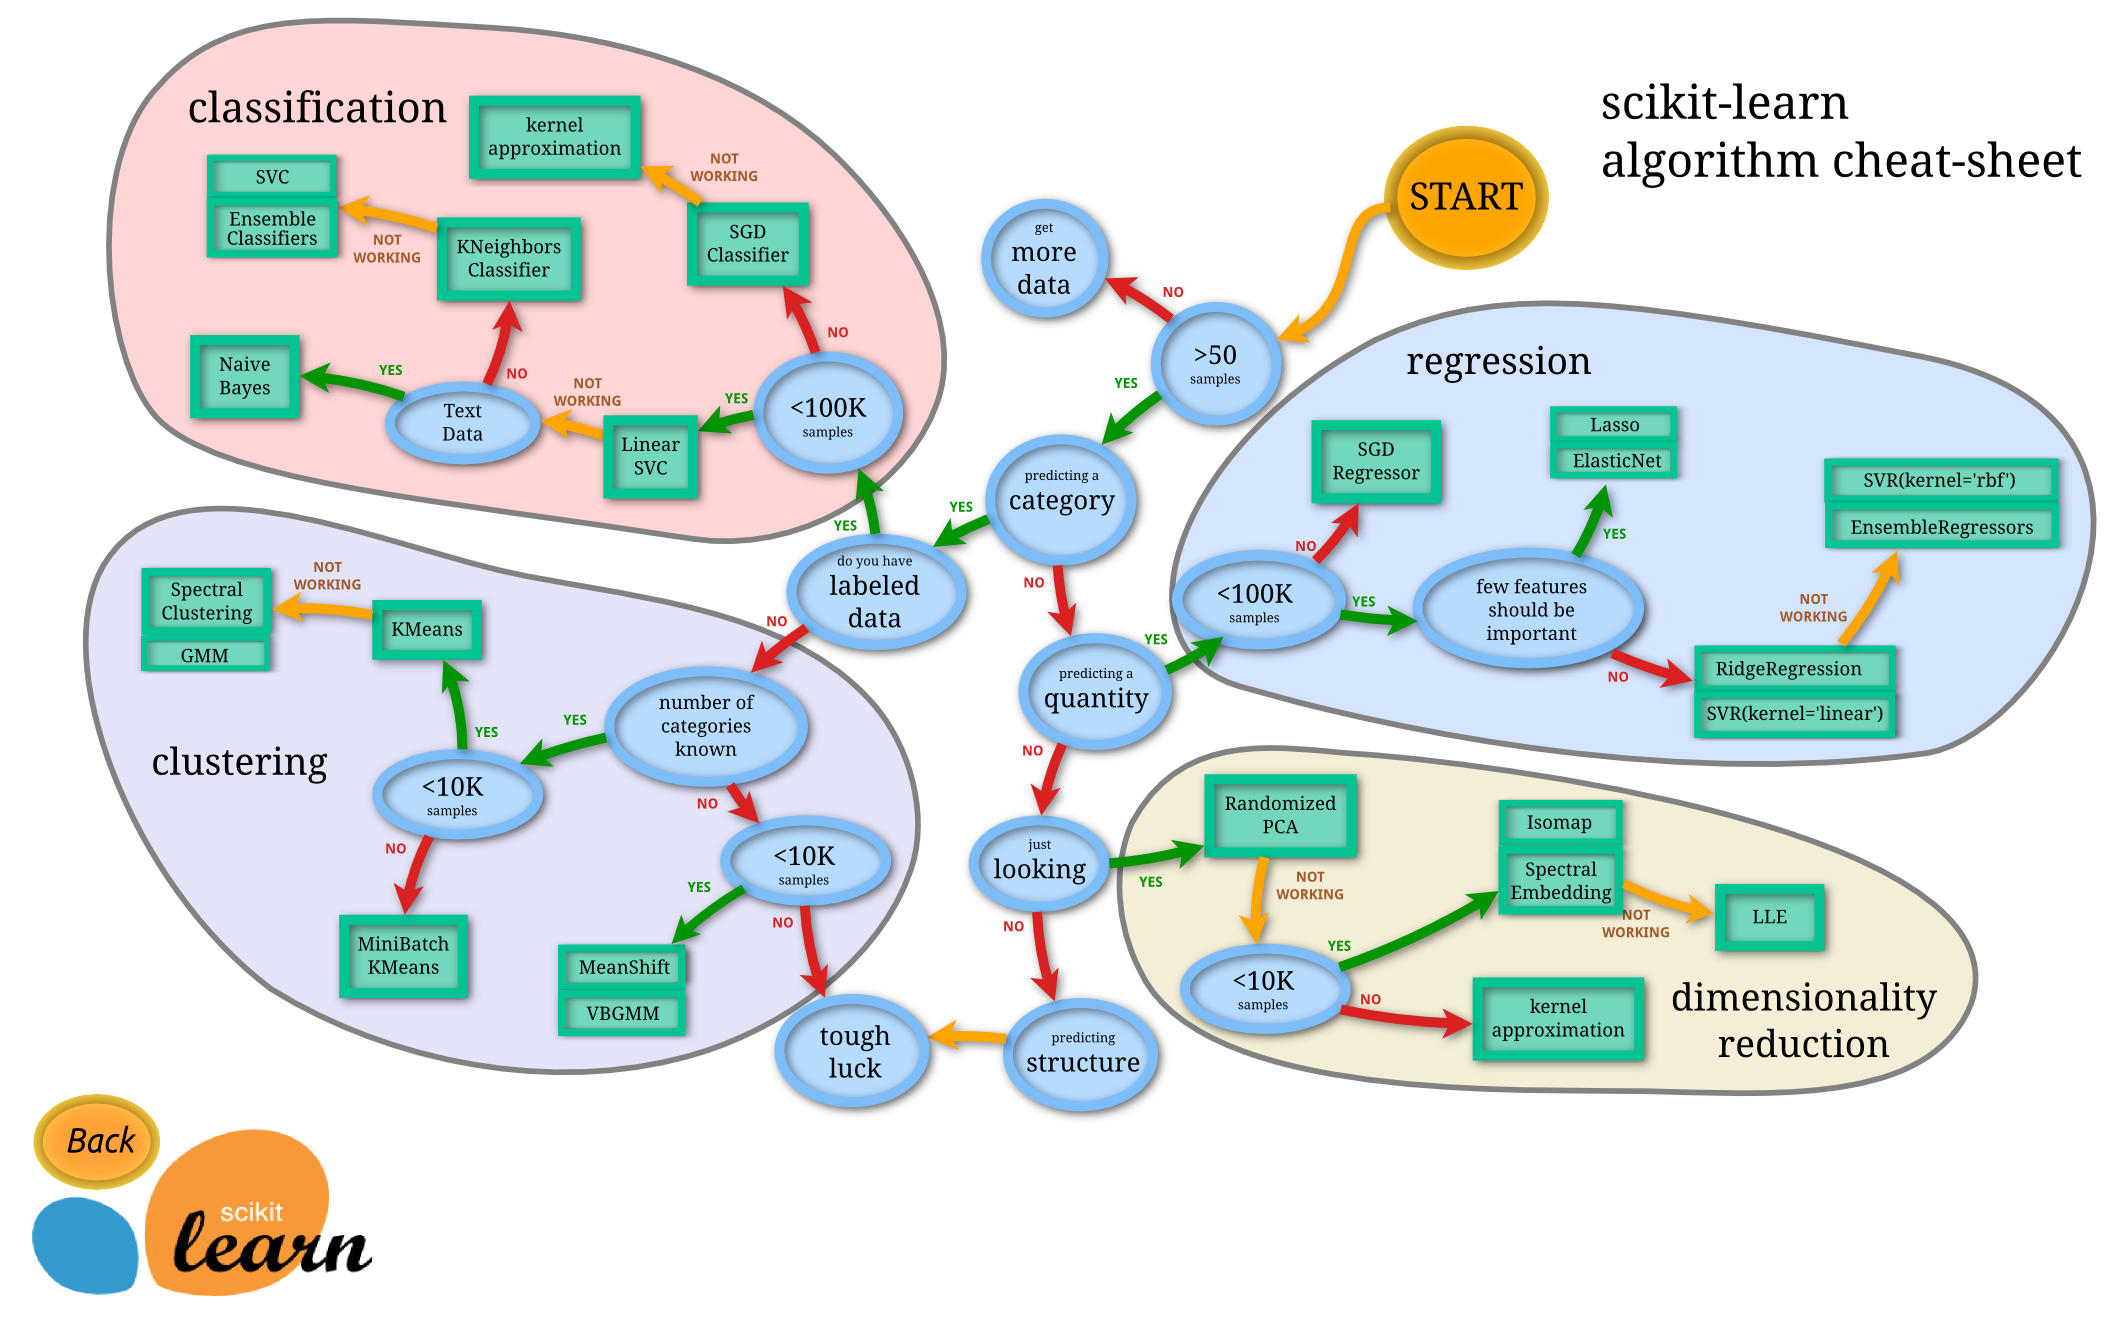

In [93]:
from PIL import Image
image = Image.open("assets/ml_map.png")
image


In [94]:
pipeline.score(test_data[features], test_data[label])  # เอา test set ไปให้ทดสอบ (ข้อมูลที่ไม่เคยเห็นมาก่อน)
# จะได้เปอร์เซนน้อยกว่า train set , ถ้าได้เพิ่มขึ้นอาจมีข้อมูลหลุด, โมเดลเหมาะกับ test

0.5121591373588563

In [100]:
sample = valid_data.sample(random_state=0)
# ใส่จำนวนแถวได้
# sample = valid_data.sample(10,random_state=0)
sample
# ข้อมูลจาก test set , model ไม่เคยดห็น

,property_type,price,location,city,baths,purpose,bedrooms,area
106323,Lower Portion,45000,G-10,Islamabad,3,For Rent,2,10.0


In [101]:
price = pipeline.predict(sample)[0]
# price = pipeline.predict(sample)
price

np.float64(34745.969883316095)

In [103]:
# price_k.inverse_transform([[price]])

In [105]:
def predict(sample):
    predicted = pipeline.predict(sample)[0]
    # price = price_k.inverse_transform([[price]]) # 🤔 log
    predicted = int(predicted)  # แปลงเป็น int เพราะ ข้อมูลจริงเป็น int
    return predicted

In [ ]:
sample = {
    "property_type": "House",
    "baths": 2,
    "bedrooms": 2,
    "city": "Islamabad",
    "area": 4.0
} # 🤔
sample = pd.DataFrame([sample])
sample

,property_type,baths,bedrooms,city,area
0,House,2,2,Islamabad,4.0


In [ ]:
predict(sample)

6353408

In [ ]:
# เพิ่มจาก 2 Baths -> 4 Baths, 2 Bedroom -> 4 Bedroom , ราคาควรเพิ่ม => ใช้เช็คปรพสิทธิภาพ  model
sample = pd.DataFrame([{"property_type": "House", "baths": 4, "bedrooms": 4, "city": "Islamabad", "area": 10.0}]) # 🤔
predict(sample)

13123328